In [49]:
import zipfile
import os

In [50]:
train_zip_path="train.zip"

In [51]:
test_zip_path="test1.zip"

In [52]:
# # חילוץ train.zip
# with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
#     zip_ref.extractall("train")
# print("train files extracted")

In [53]:
# # חילוץ train.zip
# with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
#     zip_ref.extractall("test")
# print("train files extracted")

In [54]:
train_path = "train/train"

In [55]:
test_path = "test/test1"

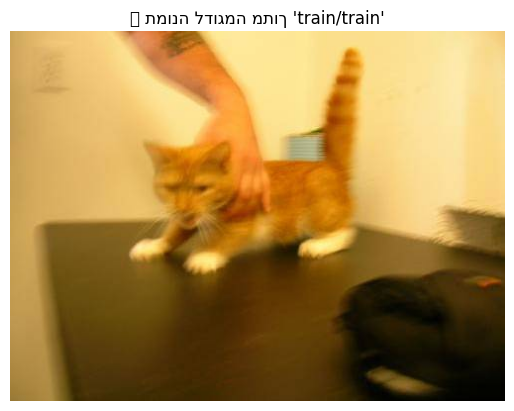

In [56]:
import matplotlib.pyplot as plt
import PIL.Image as Image

# בדיקת קבצי תמונה בתיקייה
image_files = [f for f in os.listdir(train_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

if image_files:
    sample_image_path = os.path.join(train_path, image_files[0])
    img = Image.open(sample_image_path)

    plt.imshow(img)
    plt.axis("off")
    plt.title("📷 תמונה לדוגמה מתוך 'train/train'")
    plt.show()
else:
    print("❌ לא נמצאו קבצי תמונה בתיקייה.")

In [65]:
# Step 2: Resizing Images and Normalization
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the new image size
IMG_SIZE = (64, 64)

# Function to resize and normalize an image
def preprocess_image(img_path):
    img = load_img(img_path, target_size=IMG_SIZE)  # Resize image to 128x128
    img = img_to_array(img) / 255.0  # Convert the image to an array and normalize to range [0, 1]
    return img.astype(np.float16)  # Ensure data type is float32 for better performance

print(f"✅ Image successfully resized to {IMG_SIZE} and normalized.")

✅ Image successfully resized to (64, 64) and normalized.


In [113]:
#Preprocessing a full images
def processed_images_all_data(image_files):
    return np.array([preprocess_image(os.path.join(train_path, img)) for img in image_files])
# processed_images = np.array([preprocess_image(os.path.join(train_path, img)) for img in image_files])
# print("Processed images shape:", processed_images.shape)

In [ ]:
from sklearn.model_selection import train_test_split

processed_images = processed_images_all_data(image_files)

labels = [1 if "dog" in img else 0 for img in image_files]
train_val_images, test_images, train_val_labels, test_labels = train_test_split(
    processed_images, labels, test_size=0.2, random_state=42)

train_images, val_images, train_labels, val_labels = train_test_split(
    train_val_images, train_val_labels, test_size=0.25, random_state=42)  

print(f"🖼️ {len(train_images)} training images and {len(val_images)} validation images loaded successfully and {len(test_images)}.")

🖼️ 15000 training images and 5000 validation images loaded successfully and 5000.


Decision Tree Algoritam

In [ ]:
def preprocess_image_for_tree(img_path):
    img = load_img(img_path, target_size=IMG_SIZE)  # Resize
    img = img_to_array(img) / 255.0  # Normalize
    return img.flatten().astype(np.float32)  # Flatten

tree_images = np.array([preprocess_image_for_tree(os.path.join(train_path, img)) for img in image_files])

In [ ]:
labels = [1 if "dog" in img else 0 for img in image_files]  # Make sure this is defined correctly
train_val_images, test_images, train_val_labels, test_labels = train_test_split(
    tree_images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(
    train_val_images, train_val_labels, test_size=0.25, random_state=42)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train Decision Tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(train_images, train_labels)  # Use the correctly flattened and split images

# Predictions on validation and test sets
y_val_pred = clf.predict(val_images)  
y_test_pred = clf.predict(test_images)  

# Evaluate model performance
val_acc = accuracy_score(val_labels, y_val_pred)
test_acc = accuracy_score(test_labels, y_test_pred)

print(f"📊 Validation Accuracy: {val_acc:.4f}")
print(f"📊 Test Accuracy: {test_acc:.4f}")


📊 Validation Accuracy: 0.5752
📊 Test Accuracy: 0.5726


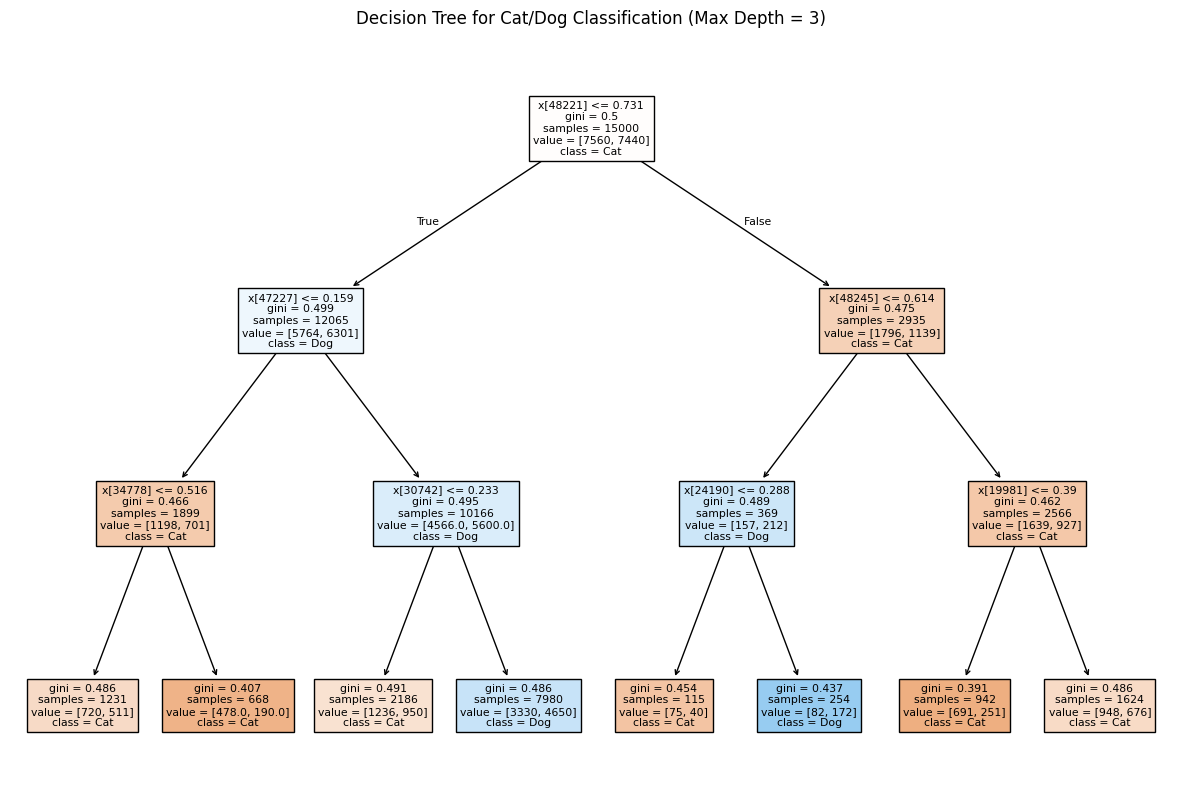

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=None, class_names=["Cat", "Dog"], filled=True)
plt.title('Decision Tree for Cat/Dog Classification (Max Depth = 3)')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_probs = clf.predict_proba(test_images)[:, 1] 

# Compute evaluation metrics
accuracy = accuracy_score(test_labels, y_test_pred) 
precision = precision_score(test_labels, y_test_pred)
recall = recall_score(test_labels, y_test_pred)
f1 = f1_score(test_labels, y_test_pred)
auc = roc_auc_score(test_labels, y_probs)

# Display results
print(f"📊 Model Performance Metrics:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")
print(f"✅ AUC-ROC: {auc:.4f}")

📊 Model Performance Metrics:
✅ Accuracy: 0.5726
✅ Precision: 0.5640
✅ Recall: 0.6173
✅ F1-score: 0.5894
✅ AUC-ROC: 0.5776


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# הגדרת המודל
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)), #if i change the img size i need to change the input shape
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') 
])

# קומפילציה של המודל
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# הדפסת סיכום המודל
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,453,569 (9.36 MB)

 Trainable params: 2,453,569 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

history = model.fit(train_images, train_labels, epochs=50, batch_size=32,validation_data=(val_images, val_labels))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 70ms/step - accuracy: 0.5586 - loss: 0.6817 - val_accuracy: 0.7100 - val_loss: 0.5588
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.7304 - loss: 0.5346 - val_accuracy: 0.7766 - val_loss: 0.4792
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.7786 - loss: 0.4657 - val_accuracy: 0.7832 - val_loss: 0.4538
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.8192 - loss: 0.4010 - val_accuracy: 0.8128 - val_loss: 0.4093
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.8511 - loss: 0.3394 - val_accuracy: 0.8106 - val_loss: 0.4136
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.8620 - loss: 0.3139 - val_accuracy: 0.8292 - val_loss: 0.3902
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.8969 - loss: 0.2491 - val_accuracy: 0.8162 - val_loss: 0.4395
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9080 - loss: 0.2249 - 

In [ ]:
# model.save_weights("ht_weights.weights.h5")

In [75]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_probs = model.predict(test_images) 
y_probs = y_probs.flatten()         

# 2. הפיכת ההסתברויות לחיזוי בינארי לפי סף של 0.5
y_pred = (y_probs >= 0.5).astype(int)


157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step


In [ ]:
#8
test_labels = np.array(test_labels)

accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)
auc = roc_auc_score(test_labels, y_probs)

print(f"📊 CNN Model Performance Metrics on Test Set:")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")
print(f"✅ AUC-ROC: {auc:.4f}")


📊 CNN Model Performance Metrics on Test Set:
✅ Accuracy: 0.8214
✅ Precision: 0.8300
✅ Recall: 0.8056
✅ F1-score: 0.8176
✅ AUC-ROC: 0.9054


In [ ]:
#9
from tensorflow.keras.optimizers import Adam

def build_model(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid') 
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [78]:
learning_rates = [0.1, 0.01, 0.001]

for lr in learning_rates:
    model = build_model(learning_rate=lr, dropout_rate=0.5)
    history = model.fit(
        train_images, train_labels,
        epochs=10, 
        batch_size=32, 
        validation_data=(val_images, val_labels),
        verbose=1
    )


c:\Users\eden.amram\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.5002 - loss: 323.9031 - val_accuracy: 0.5150 - val_loss: 0.6928
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.4993 - loss: 0.6947 - val_accuracy: 0.5150 - val_loss: 0.6933
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.5010 - loss: 0.6946 - val_accuracy: 0.4850 - val_loss: 0.7029
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 110ms/step - accuracy: 0.5036 - loss: 0.6956 - val_accuracy: 0.5150 - val_loss: 0.6965
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 117ms/step - accuracy: 0.5062 - loss: 0.6953 - val_accuracy: 0.4850 - val_loss: 0.6974
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - accuracy: 0.5060 - loss: 0.6949 - val_accuracy: 0.4850 - val_loss: 0.6935
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 114ms/step - accuracy: 0.5008 - loss: 0.6949 - val_accuracy: 0.5150 - val_loss: 0.6928
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 93ms/step - accuracy: 0.4892 - loss: 0.6

In [ ]:
batch_sizes = [16, 32, 64]

for bs in batch_sizes:
    model = build_model(learning_rate=0.001, dropout_rate=0.5)
    history = model.fit(
        train_images, train_labels,
        epochs=10,
        batch_size=bs,
        validation_data=(val_images, val_labels),
        verbose=1
    )


In [ ]:
dropout_rates = [0.3, 0.5, 0.7]

for dr in dropout_rates:
    model = build_model(learning_rate=0.001, dropout_rate=dr)
    history = model.fit(
        train_images, train_labels,
        epochs=10,
        batch_size=32,
        validation_data=(val_images, val_labels),
        verbose=1
    )


In [81]:
#10
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred)
print(cm)

[[2105  410]
 [ 483 2002]]


In [ ]:
#check the misclassified images (FN, FP)
misclassified_indices = [i for i in range(len(test_labels)) if test_labels[i] != y_pred[i]]

print(misclassified_indices)


[2, 16, 37, 40, 41, 43, 46, 52, 54, 56, 57, 58, 68, 76, 82, 84, 88, 102, 111, 120, 123, 124, 128, 145, 153, 160, 163, 165, 172, 176, 179, 189, 191, 195, 199, 202, 218, 232, 234, 235, 250, 252, 255, 258, 261, 262, 263, 267, 271, 272, 281, 290, 295, 296, 308, 312, 317, 318, 322, 328, 344, 346, 348, 360, 364, 369, 382, 390, 394, 396, 401, 414, 417, 419, 423, 427, 428, 433, 450, 466, 476, 478, 497, 500, 501, 509, 512, 522, 525, 526, 542, 547, 548, 549, 551, 554, 557, 559, 560, 566, 572, 574, 593, 603, 606, 607, 609, 615, 632, 633, 634, 635, 643, 649, 650, 655, 664, 671, 675, 679, 683, 702, 706, 707, 711, 742, 747, 750, 764, 768, 785, 787, 799, 803, 808, 813, 817, 819, 825, 832, 836, 844, 846, 848, 854, 855, 865, 881, 905, 914, 929, 934, 936, 949, 953, 954, 957, 966, 975, 976, 988, 994, 996, 999, 1002, 1010, 1012, 1016, 1018, 1024, 1035, 1037, 1038, 1047, 1052, 1054, 1058, 1061, 1063, 1077, 1083, 1090, 1092, 1094, 1102, 1110, 1111, 1113, 1116, 1117, 1118, 1125, 1138, 1144, 1147, 1148, 1156,

In [91]:
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid') 
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

In [92]:
model = build_model()

# טוען משקולות קודמות
model.load_weights("ht_weights.weights.h5")
print("Loaded weights from 'ht_weights.weights.h5'")


Loaded weights from 'ht_weights.weights.h5'


In [93]:
import numpy as np

X_mis = test_images[misclassified_indices]
y_mis = test_labels[misclassified_indices]

print("Misclassified subset shape:", X_mis.shape)
print("Misclassified labels shape:", y_mis.shape)


Misclassified subset shape: (893, 64, 64, 3)
Misclassified labels shape: (893,)


In [95]:
# נניח train_images_orig, train_labels_orig היו דאטהסט האימון המקורי
X_combined = np.concatenate([train_images, X_mis], axis=0)
y_combined = np.concatenate([train_labels, y_mis], axis=0)

history_fine = model.fit(
    X_combined, y_combined,
    epochs=5,
    batch_size=32,
    validation_data=(val_images, val_labels),
    verbose=1
)


Epoch 1/5
497/497 ━━━━━━━━━━━━━━━━━━━━ 35s 66ms/step - accuracy: 0.9410 - loss: 0.2633 - val_accuracy: 0.8394 - val_loss: 0.4811
Epoch 2/5
497/497 ━━━━━━━━━━━━━━━━━━━━ 31s 63ms/step - accuracy: 0.9634 - loss: 0.1065 - val_accuracy: 0.8406 - val_loss: 0.5680
Epoch 3/5
497/497 ━━━━━━━━━━━━━━━━━━━━ 32s 64ms/step - accuracy: 0.9779 - loss: 0.0628 - val_accuracy: 0.8400 - val_loss: 0.6126
Epoch 4/5
497/497 ━━━━━━━━━━━━━━━━━━━━ 30s 61ms/step - accuracy: 0.9841 - loss: 0.0432 - val_accuracy: 0.8332 - val_loss: 0.8093
Epoch 5/5
497/497 ━━━━━━━━━━━━━━━━━━━━ 35s 71ms/step - accuracy: 0.9859 - loss: 0.0383 - val_accuracy: 0.8394 - val_loss: 0.7753


# To increase the model's accuracy, we first examined where the model went wrong
# using a confusion matrix. We then identified the specific examples it misclassified
# and performed fine-tuning. Fine-tuning involves continuing the training of the model
# (with the same architecture and previously saved weights), specifically focusing on
# challenging or misclassified samples. This helps the model correct its mistakes
# and improve performance without losing its existing knowledge.

In [101]:
#11
import os
import random

cat_files = [f for f in image_files if "cat" in f.lower()]
dog_files = [f for f in image_files if "dog" in f.lower()]

print("Initial number of cat images:", len(cat_files))
print("Initial number of dog images:", len(dog_files))

#A small percentage (20%) of the cat photos is randomly selected
ratio_to_keep = 0.2
num_cats_to_keep = int(ratio_to_keep * len(cat_files))
cat_files_small = random.sample(cat_files, num_cats_to_keep)
num_dogs_to_keep = int(0.1 * len(dog_files))
dogs_files_small = random.sample(dog_files, num_dogs_to_keep)

#create a list of all unbalanced files
unbalanced_files = cat_files_small + dogs_files_small

print("After removal, cat images:", len(cat_files_small))
print("Dog images remain:", len(dog_files))
print("Total unbalanced dataset size:", len(unbalanced_files))


Initial number of cat images: 12500
Initial number of dog images: 12500
After removal, cat images: 2500
Dog images remain: 12500
Total unbalanced dataset size: 3750


In [102]:
unbalanced_images = []
unbalanced_labels = []

for f in unbalanced_files:
    full_path = os.path.join(train_path, f)
    unbalanced_images.append(preprocess_image(full_path))

    # קובעים את התווית לפי שם הקובץ
    if "dog" in f.lower():
        unbalanced_labels.append(1)
    else:  # cat
        unbalanced_labels.append(0)

# המרת הרשימות למערכי NumPy
unbalanced_images = np.array(unbalanced_images)
unbalanced_labels = np.array(unbalanced_labels)

In [103]:
train_val_images, test_images, train_val_labels, test_labels = train_test_split(
    unbalanced_images, unbalanced_labels, test_size=0.2, random_state=42
)

train_images, val_images, train_labels, val_labels = train_test_split(
    train_val_images, train_val_labels, test_size=0.25, random_state=42
)

In [104]:
model = build_model()

c:\Users\eden.amram\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [105]:
model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(val_images, val_labels)
)

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.6335 - loss: 0.6682 - val_accuracy: 0.6400 - val_loss: 0.6541
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.6741 - loss: 0.6398 - val_accuracy: 0.6400 - val_loss: 0.6302
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.6721 - loss: 0.6118 - val_accuracy: 0.6400 - val_loss: 0.6612
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.6788 - loss: 0.6039 - val_accuracy: 0.6800 - val_loss: 0.6220
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - accuracy: 0.7127 - loss: 0.5745 - val_accuracy: 0.6720 - val_loss: 0.6042
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.7136 - loss: 0.5563 - val_accuracy: 0.6573 - val_loss: 0.6151
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.7343 - loss: 0.5196 - val_accuracy: 0.7187 - val_loss: 0.5667
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.7788 - loss: 0.4869 - val_accuracy: 0.74

In [ ]:
#12
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_improved_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        BatchNormalization(),                # הוספת Batch Norm אחרי השכבה הראשונה
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),                # Batch Norm גם פה
        MaxPooling2D(2, 2),
        
        # שכבת קונבולוציה נוספת להעמקת הרשת
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [107]:
model = build_improved_model()

In [114]:
processed_images = processed_images_all_data(image_files)

labels = [1 if "dog" in img else 0 for img in image_files]
train_val_images, test_images, train_val_labels, test_labels = train_test_split(
    processed_images, labels, test_size=0.2, random_state=42)

train_images, val_images, train_labels, val_labels = train_test_split(
    train_val_images, train_val_labels, test_size=0.25, random_state=42)  


In [ ]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=32,
    validation_data=(val_images, val_labels)
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 147ms/step - accuracy: 0.6841 - loss: 0.6108 - val_accuracy: 0.6988 - val_loss: 0.5811
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 135ms/step - accuracy: 0.7729 - loss: 0.4755 - val_accuracy: 0.7474 - val_loss: 0.5317
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 139ms/step - accuracy: 0.8037 - loss: 0.4227 - val_accuracy: 0.7066 - val_loss: 0.6035
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 127ms/step - accuracy: 0.8478 - loss: 0.3424 - val_accuracy: 0.7432 - val_loss: 0.5345
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 125ms/step - accuracy: 0.8719 - loss: 0.2913 - val_accuracy: 0.7598 - val_loss: 0.5259
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 128ms/step - accuracy: 0.9020 - loss: 0.2383 - val_accuracy: 0.7936 - val_loss: 0.4822
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 137ms/step - accuracy: 0.9234 - loss: 0.1922 - val_accuracy: 0.8100 - val_loss: 0.4285
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 60s 127ms/step - accuracy: 0.9399 - loss: 0

# 1. Added Batch Normalization (BatchNormalization) layers:
#    - Placed after each Conv2D layer. Batch Norm helps stabilize learning by
#      normalizing the outputs of the preceding layer, which often allows the
#      network to converge faster and can improve overall performance.

# 2. Introduced an additional Conv2D layer:
#    - We now have three convolutional layers (32 filters, 64 filters, and then
#      128 filters), compared to only two in the older model. A deeper network
#      can capture more complex features, enhancing the model's ability to
#      distinguish subtle differences between images.

# 3. Maintained the existing Flatten, Dense(512), and Dropout(0.5) layers:
#    - These layers still provide the fully connected classification portion and
#      help prevent overfitting via Dropout.

# 4. Overall effect on performance and speed:
#    - More layers and filters = more parameters, which might slow each epoch
#      slightly, but Batch Norm typically helps each epoch converge faster.
#    - Expected outcome: better accuracy or more stable training, provided the
#      dataset and model size are well-matched.

# In summary, the new function adds both depth (by introducing another Conv2D
# layer) and stability (through Batch Normalization), making the network more
# powerful and potentially more resilient against overfitting. 
